# Linear and Multiple Linear Regression
## Author : Ruthvicp
### Date : 3/13/2019

### Submitted for Lab2 - CS5590 Python Deep Learning
### Dataset : https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade/version/2

## 4. Create a Multiple Linear Regression model for top 5000 youtube dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [128]:
df = pd.read_csv("data.csv")
# take a look at the dataset
df.head()

,Rank,Grade,Channel_name,Video_Uploads,Subscribers,Video_views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [129]:
df = df.replace({'--': '0'}, regex=True)

In [130]:
df.describe()

,Video_views
count,5.000000e+03
mean,1.071449e+09
std,2.003844e+09
min,7.500000e+01
25%,1.862329e+08
50%,4.820548e+08
75%,1.124368e+09
max,4.754884e+10


Skew function is used to find the range of temperatures. When the range is high, this can be used to interpret the data & apply log on this value (our target) to get scaled results

Skew is: 6.976136675463147


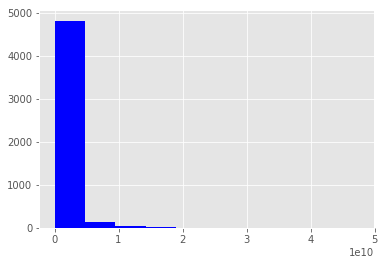

In [131]:
print ("Skew is:", df['Video_views'].skew())
plt.hist(df['Video_views'], color='blue')
plt.show()

In [132]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,Video_views
0,20869786591
1,47548839843
2,9793305082
3,22675948293
4,26273668433


In [133]:
df.Subscribers = pd.to_numeric(df.Subscribers, errors='coerce')

In [134]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

               Null Count
Feature                  
Video_views             0
Subscribers             0
Video_Uploads           0
Channel_name            0
Grade                   0
Rank                    0


In [135]:
data = numeric_features.interpolate().dropna()
print(sum(data.isnull().sum() != 0))

0


In [136]:
categorical_features = df.select_dtypes(exclude=[np.number])
categorical_features.describe()

,Rank,Grade,Channel_name,Video_Uploads
count,5000,5000,5000,5000
unique,5000,6,4993,2286
top,"4,626th",B+,Super Kids,26
freq,1,2956,2,17


In [137]:
print(df.Grade.value_counts())

B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: Grade, dtype: int64


In [138]:
df['Grade'] = pd.factorize(df.Grade)[0]

In [139]:
df.head()

,Rank,Grade,Channel_name,Video_Uploads,Subscribers,Video_views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,0,SET India,27323,31180559,22675948293
4,5th,0,WWE,36756,32852346,26273668433


Skew is: -1.1872284010282859


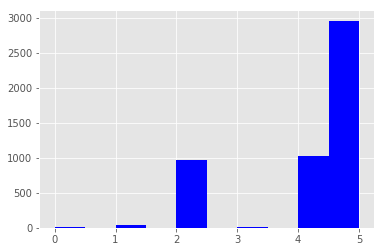

In [140]:
print ("Skew is:", df['Grade'].skew())
plt.hist(df['Grade'], color='blue')
plt.show()

### Train and Test Data - Attempt 1
Here, target column 'Temperature (c)' is filtered into y. Drop irrelevant data which does not signify the regression equation (y = m1x1 + m2x2 + .. + c). Then we split the data into test, train datasets

In [141]:
y = df['Video_views']
x = df.drop(['Rank','Channel_name', 'Video_views'], axis=1)
print(x.columns.values)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.30)

['Grade' 'Video_Uploads' 'Subscribers']


In [143]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
##Evaluate the performance and visualize results
print ("R^2 is: \n", model.score(X_test, y_test))
y_predicted = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_predicted))


R^2 is: 
 0.5089918039044261
RMSE is: 
 1.48183433733783e+18


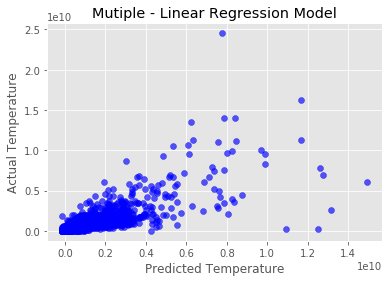

In [144]:
plt.scatter(y_predicted, y_test, alpha=.65,color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Temperature')
plt.ylabel('Actual Temperature')
plt.title('Mutiple - Linear Regression Model')
plt.show()
